In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

In [ ]:
df=pd.read_csv("/content/Disputed_Essay_data.csv")

In [ ]:
df.head()

,author,filename,a,all,also,an,and,any,are,as,...,was,were,what,when,which,who,will,with,would,your
0,dispt,dispt_fed_49.txt,0.280,0.052,0.009,0.096,0.358,0.026,0.131,0.122,...,0.009,0.017,0.000,0.009,0.175,0.044,0.009,0.087,0.192,0.0
1,dispt,dispt_fed_50.txt,0.177,0.063,0.013,0.038,0.393,0.063,0.051,0.139,...,0.051,0.000,0.000,0.000,0.114,0.038,0.089,0.063,0.139,0.0
2,dispt,dispt_fed_51.txt,0.339,0.090,0.008,0.030,0.301,0.008,0.068,0.203,...,0.008,0.015,0.008,0.000,0.105,0.008,0.173,0.045,0.068,0.0
3,dispt,dispt_fed_52.txt,0.270,0.024,0.016,0.024,0.262,0.056,0.064,0.111,...,0.087,0.079,0.008,0.024,0.167,0.000,0.079,0.079,0.064,0.0
4,dispt,dispt_fed_53.txt,0.303,0.054,0.027,0.034,0.404,0.040,0.128,0.148,...,0.027,0.020,0.020,0.007,0.155,0.027,0.168,0.074,0.040,0.0


In [ ]:
df_test = df[df["author"]=="dispt"]
df_test.head()

,author,filename,a,all,also,an,and,any,are,as,...,was,were,what,when,which,who,will,with,would,your
0,dispt,dispt_fed_49.txt,0.280,0.052,0.009,0.096,0.358,0.026,0.131,0.122,...,0.009,0.017,0.000,0.009,0.175,0.044,0.009,0.087,0.192,0.0
1,dispt,dispt_fed_50.txt,0.177,0.063,0.013,0.038,0.393,0.063,0.051,0.139,...,0.051,0.000,0.000,0.000,0.114,0.038,0.089,0.063,0.139,0.0
2,dispt,dispt_fed_51.txt,0.339,0.090,0.008,0.030,0.301,0.008,0.068,0.203,...,0.008,0.015,0.008,0.000,0.105,0.008,0.173,0.045,0.068,0.0
3,dispt,dispt_fed_52.txt,0.270,0.024,0.016,0.024,0.262,0.056,0.064,0.111,...,0.087,0.079,0.008,0.024,0.167,0.000,0.079,0.079,0.064,0.0
4,dispt,dispt_fed_53.txt,0.303,0.054,0.027,0.034,0.404,0.040,0.128,0.148,...,0.027,0.020,0.020,0.007,0.155,0.027,0.168,0.074,0.040,0.0


In [ ]:
df_trn = df[df["author"]!="dispt"]
df_trn.head()

,author,filename,a,all,also,an,and,any,are,as,...,was,were,what,when,which,who,will,with,would,your
11,Hamilton,Hamilton_fed_1.txt,0.213,0.083,0.000,0.083,0.343,0.056,0.111,0.093,...,0.000,0.000,0.000,0.009,0.158,0.074,0.222,0.046,0.019,0.074
12,Hamilton,Hamilton_fed_11.txt,0.369,0.070,0.006,0.076,0.411,0.023,0.053,0.117,...,0.000,0.012,0.012,0.012,0.147,0.029,0.094,0.129,0.270,0.000
13,Hamilton,Hamilton_fed_12.txt,0.305,0.047,0.007,0.068,0.386,0.047,0.102,0.108,...,0.000,0.000,0.007,0.000,0.156,0.007,0.074,0.122,0.149,0.000
14,Hamilton,Hamilton_fed_13.txt,0.391,0.045,0.015,0.030,0.270,0.045,0.060,0.090,...,0.000,0.000,0.000,0.045,0.165,0.045,0.135,0.150,0.210,0.000
15,Hamilton,Hamilton_fed_15.txt,0.327,0.096,0.000,0.086,0.356,0.014,0.086,0.072,...,0.014,0.038,0.014,0.019,0.264,0.029,0.091,0.086,0.062,0.010


In [ ]:
df_trn.isna().sum()

author      0
filename    0
a           0
all         0
also        0
           ..
who         0
will        0
with        0
would       0
your        0
Length: 72, dtype: int64

In [ ]:
x = df_trn.drop(["author","filename"],axis=1)
y = df_trn["author"]
x.head()


,a,all,also,an,and,any,are,as,at,be,...,was,were,what,when,which,who,will,with,would,your
11,0.213,0.083,0.000,0.083,0.343,0.056,0.111,0.093,0.065,0.315,...,0.000,0.000,0.000,0.009,0.158,0.074,0.222,0.046,0.019,0.074
12,0.369,0.070,0.006,0.076,0.411,0.023,0.053,0.117,0.065,0.258,...,0.000,0.012,0.012,0.012,0.147,0.029,0.094,0.129,0.270,0.000
13,0.305,0.047,0.007,0.068,0.386,0.047,0.102,0.108,0.088,0.271,...,0.000,0.000,0.007,0.000,0.156,0.007,0.074,0.122,0.149,0.000
14,0.391,0.045,0.015,0.030,0.270,0.045,0.060,0.090,0.015,0.376,...,0.000,0.000,0.000,0.045,0.165,0.045,0.135,0.150,0.210,0.000
15,0.327,0.096,0.000,0.086,0.356,0.014,0.086,0.072,0.115,0.211,...,0.014,0.038,0.014,0.019,0.264,0.029,0.091,0.086,0.062,0.010


In [ ]:
 X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=.2)

In [ ]:
dtree = DecisionTreeClassifier(criterion="gini").fit(X_train,y_train)

In [ ]:
ptree = dtree.predict(X_test)

In [ ]:
confusion_matrix(y_test,ptree)

array([[ 0,  0,  1,  0],
       [ 0, 11,  0,  0],
       [ 0,  0,  0,  0],
       [ 0,  1,  0,  2]])

In [ ]:
accuracy_score(y_test,ptree)

0.8666666666666667

In [ ]:
rf = RandomForestClassifier(n_estimators=100).fit(X_train,y_train)

In [ ]:
p_rf = rf.predict(X_test)

In [ ]:
accuracy_score(y_test,p_rf)

0.8

In [ ]:
tree.export_text(dtree)

'|--- feature_59 <= 0.01\n|   |--- feature_64 <= 0.11\n|   |   |--- class: Jay\n|   |--- feature_64 >  0.11\n|   |   |--- feature_36 <= 0.06\n|   |   |   |--- feature_24 <= 0.05\n|   |   |   |   |--- class: Hamilton\n|   |   |   |--- feature_24 >  0.05\n|   |   |   |   |--- class: HM\n|   |   |--- feature_36 >  0.06\n|   |   |   |--- class: Madison\n|--- feature_59 >  0.01\n|   |--- class: Hamilton\n'

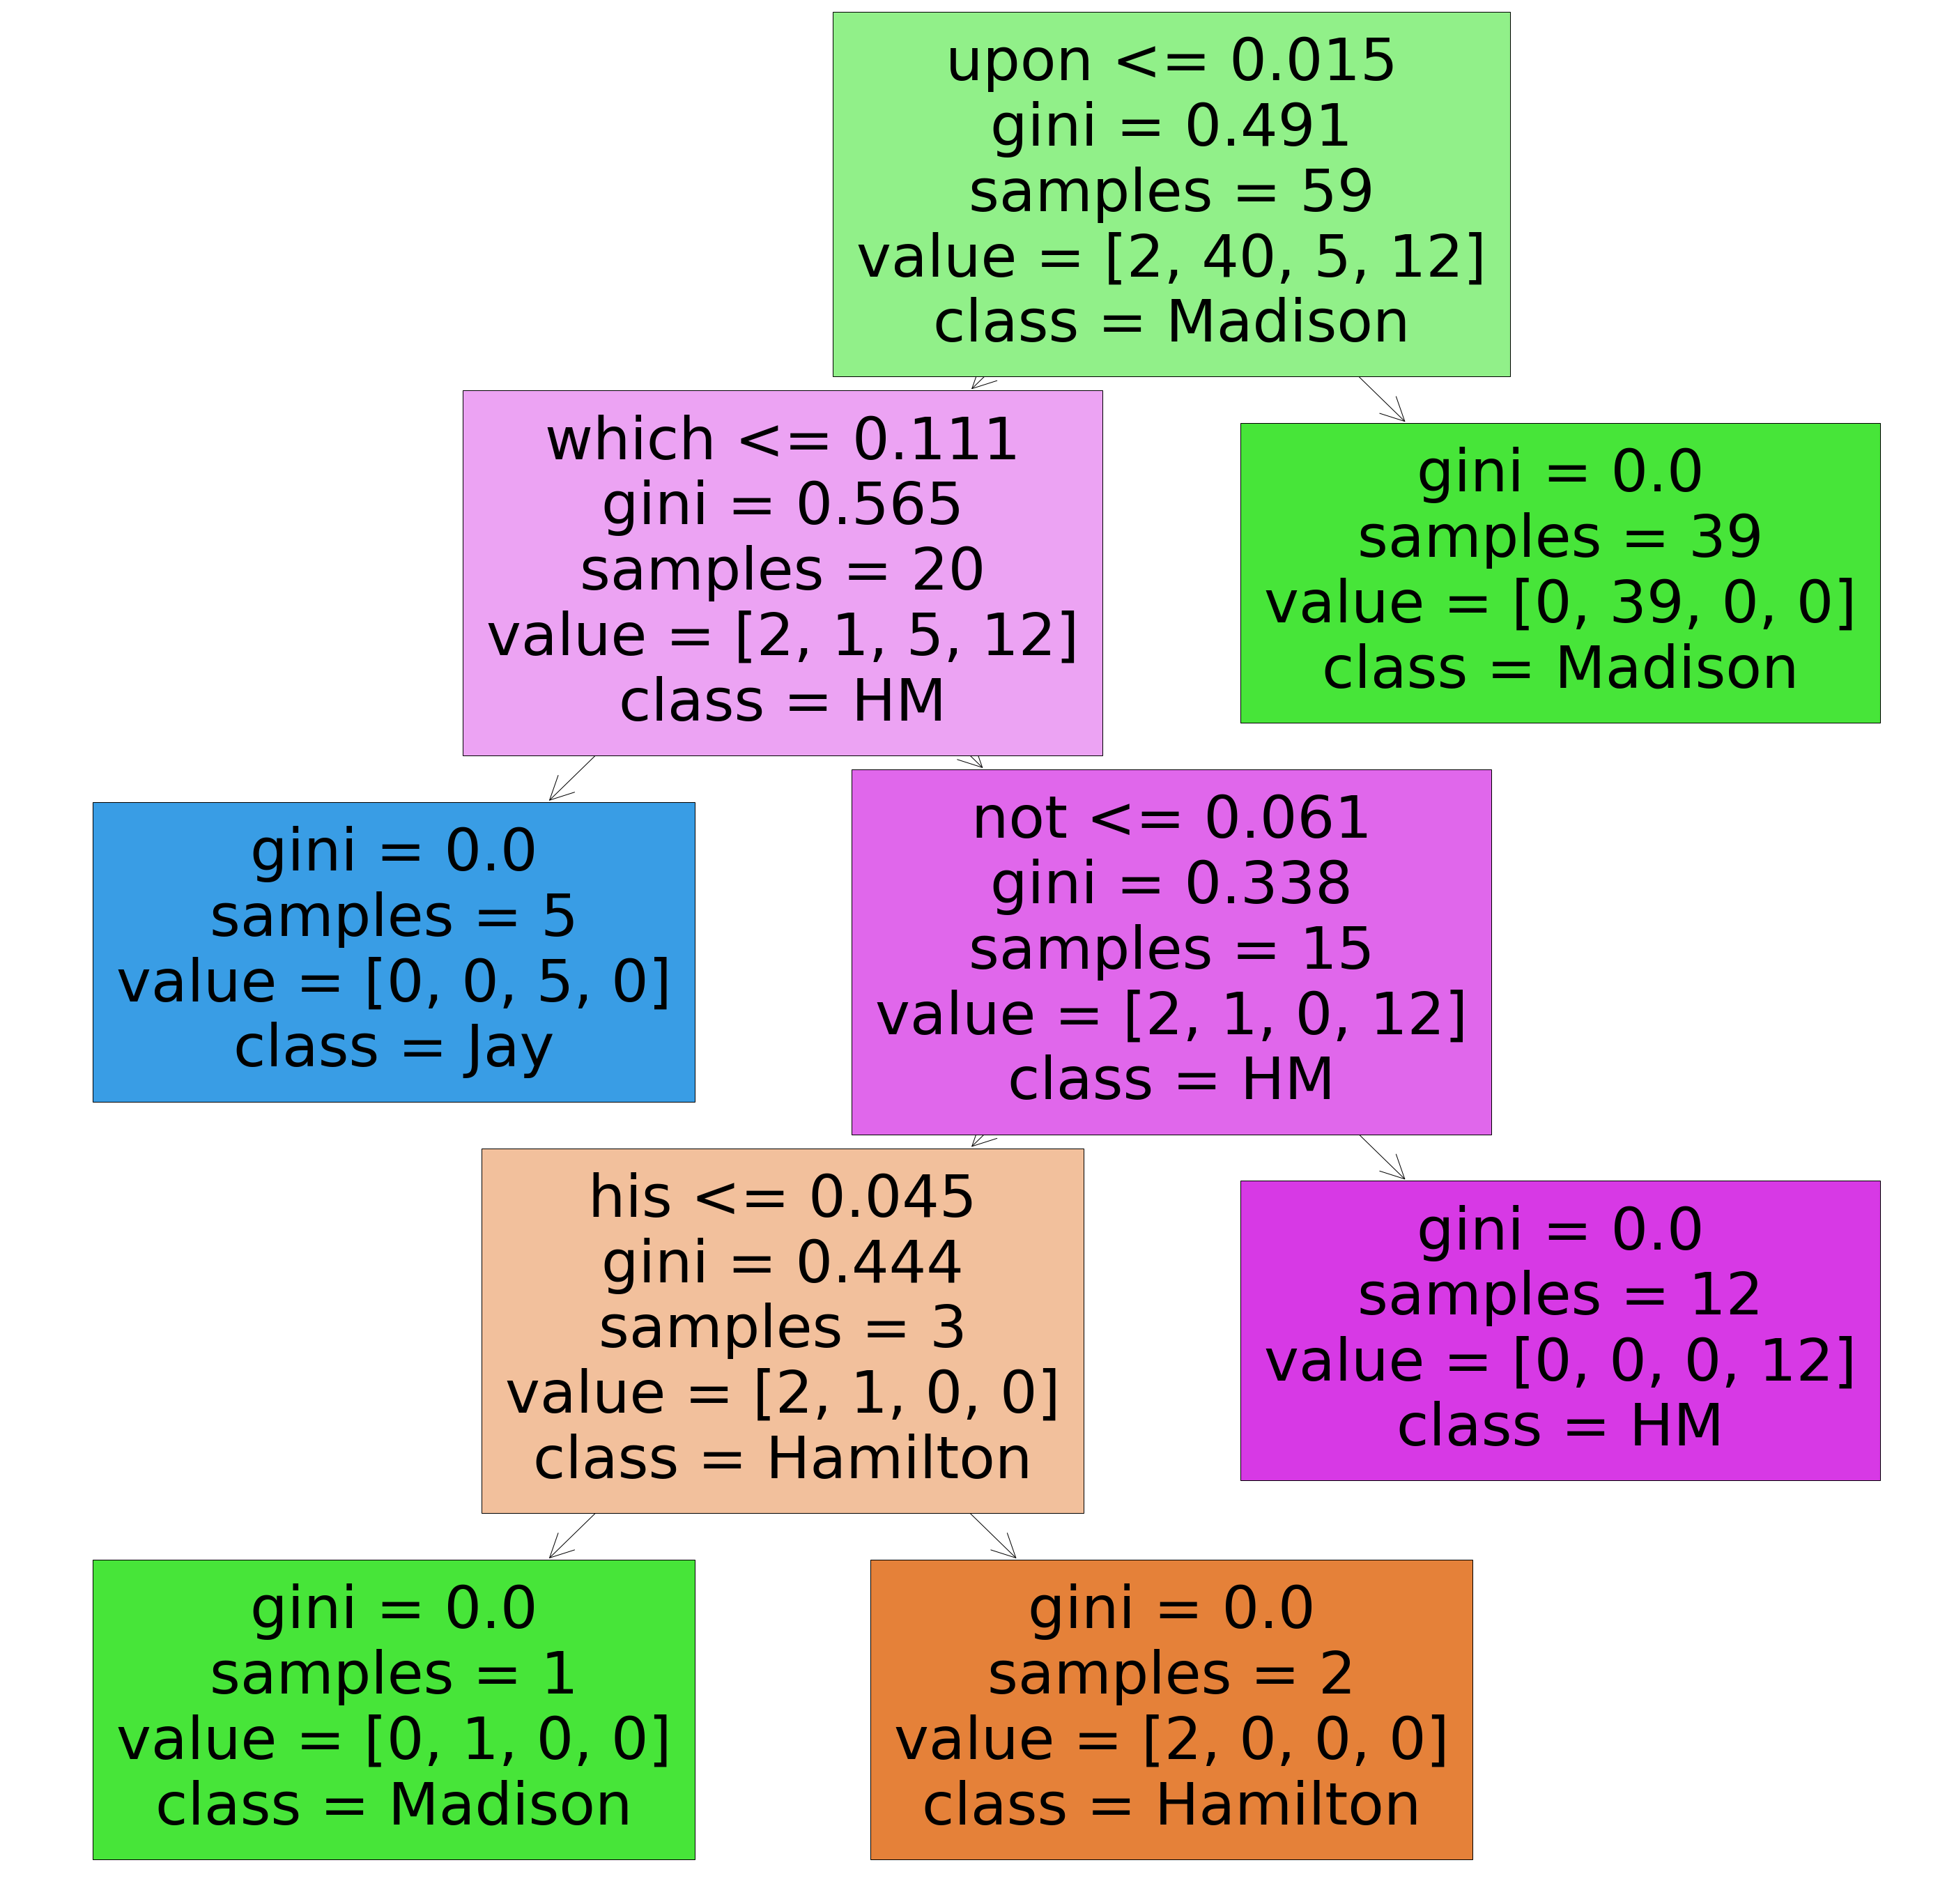

In [ ]:
fig = plt.figure(figsize=(50,50))
tree.plot_tree(dtree,feature_names=x.columns,class_names=df_trn["author"].value_counts().index,filled=True)
plt.show()

In [ ]:
df_test = df.drop(["author","filename"],axis = 1)

In [ ]:
p_test=dtree.predict(df_test)
p_test

array(['Madison', 'Madison', 'Jay', 'Madison', 'Madison', 'Madison',
       'Madison', 'Madison', 'Madison', 'Madison', 'Madison', 'Hamilton',
       'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton',
       'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton',
       'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton',
       'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton',
       'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton',
       'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton',
       'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton',
       'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton',
       'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton',
       'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton', 'Hamilton', 'Jay',
       'HM', 'HM', 'Jay', 'Jay', 'Jay', 'Jay', 'Jay', 'Madison',
       'Madison', 'Madison', 'Hamilton', 'Madison', 'Madison', 'Madison',
       'Madison', 'Madison', 'Madison', '

In [ ]:
df_test['predicted_author']=p_test
df_test

,a,all,also,an,and,any,are,as,at,be,...,were,what,when,which,who,will,with,would,your,predicted_author
0,0.280,0.052,0.009,0.096,0.358,0.026,0.131,0.122,0.017,0.411,...,0.017,0.000,0.009,0.175,0.044,0.009,0.087,0.192,0.0,Madison
1,0.177,0.063,0.013,0.038,0.393,0.063,0.051,0.139,0.114,0.393,...,0.000,0.000,0.000,0.114,0.038,0.089,0.063,0.139,0.0,Madison
2,0.339,0.090,0.008,0.030,0.301,0.008,0.068,0.203,0.023,0.474,...,0.015,0.008,0.000,0.105,0.008,0.173,0.045,0.068,0.0,Jay
3,0.270,0.024,0.016,0.024,0.262,0.056,0.064,0.111,0.056,0.365,...,0.079,0.008,0.024,0.167,0.000,0.079,0.079,0.064,0.0,Madison
4,0.303,0.054,0.027,0.034,0.404,0.040,0.128,0.148,0.013,0.344,...,0.020,0.020,0.007,0.155,0.027,0.168,0.074,0.040,0.0,Madison
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0.136,0.054,0.014,0.048,0.422,0.027,0.048,0.150,0.027,0.354,...,0.027,0.007,0.000,0.116,0.007,0.218,0.102,0.075,0.0,Madison
81,0.212,0.028,0.006,0.050,0.391,0.033,0.073,0.117,0.033,0.402,...,0.011,0.022,0.000,0.128,0.028,0.223,0.095,0.162,0.0,Madison
82,0.177,0.052,0.047,0.047,0.436,0.026,0.135,0.083,0.036,0.182,...,0.021,0.010,0.010,0.114,0.031,0.016,0.099,0.021,0.0,Madison
83,0.243,0.091,0.008,0.084,0.372,0.008,0.046,0.137,0.030,0.235,...,0.023,0.008,0.000,0.213,0.038,0.076,0.061,0.023,0.0,Madison


In [ ]:
#clustering

In [ ]:
df_trn

,author,filename,a,all,also,an,and,any,are,as,...,was,were,what,when,which,who,will,with,would,your
11,Hamilton,Hamilton_fed_1.txt,0.213,0.083,0.000,0.083,0.343,0.056,0.111,0.093,...,0.000,0.000,0.000,0.009,0.158,0.074,0.222,0.046,0.019,0.074
12,Hamilton,Hamilton_fed_11.txt,0.369,0.070,0.006,0.076,0.411,0.023,0.053,0.117,...,0.000,0.012,0.012,0.012,0.147,0.029,0.094,0.129,0.270,0.000
13,Hamilton,Hamilton_fed_12.txt,0.305,0.047,0.007,0.068,0.386,0.047,0.102,0.108,...,0.000,0.000,0.007,0.000,0.156,0.007,0.074,0.122,0.149,0.000
14,Hamilton,Hamilton_fed_13.txt,0.391,0.045,0.015,0.030,0.270,0.045,0.060,0.090,...,0.000,0.000,0.000,0.045,0.165,0.045,0.135,0.150,0.210,0.000
15,Hamilton,Hamilton_fed_15.txt,0.327,0.096,0.000,0.086,0.356,0.014,0.086,0.072,...,0.014,0.038,0.014,0.019,0.264,0.029,0.091,0.086,0.062,0.010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Madison,Madison_fed_45.txt,0.136,0.054,0.014,0.048,0.422,0.027,0.048,0.150,...,0.020,0.027,0.007,0.000,0.116,0.007,0.218,0.102,0.075,0.000
81,Madison,Madison_fed_46.txt,0.212,0.028,0.006,0.050,0.391,0.033,0.073,0.117,...,0.067,0.011,0.022,0.000,0.128,0.028,0.223,0.095,0.162,0.000
82,Madison,Madison_fed_47.txt,0.177,0.052,0.047,0.047,0.436,0.026,0.135,0.083,...,0.021,0.021,0.010,0.010,0.114,0.031,0.016,0.099,0.021,0.000
83,Madison,Madison_fed_48.txt,0.243,0.091,0.008,0.084,0.372,0.008,0.046,0.137,...,0.023,0.023,0.008,0.000,0.213,0.038,0.076,0.061,0.023,0.000


In [ ]:
x=df_trn.drop(["author","filename"],axis = 1)

In [ ]:
x_scaled = StandardScaler().fit_transform(x)

In [ ]:
#find the optimal value of k

In [ ]:
wcss=[]
for i in range(1,11):
  kmod = KMeans(n_clusters = i,init = "k-means++").fit(x_scaled)
  wcss.append(kmod.inertia_)

In [ ]:
wcss

[5180.0,
 4794.150878286262,
 4600.099380633184,
 4438.876372558396,
 4176.002339869243,
 4057.701137385433,
 3976.4358574823177,
 3834.918554854935,
 3810.084667467155,
 3580.6223125513984]

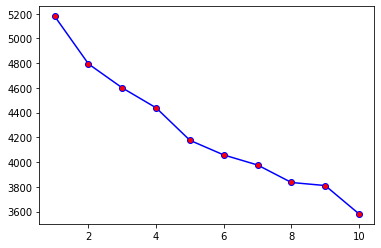

In [ ]:
plt.plot(range(1,11),wcss,marker="o",c="blue",markerFaceColor="red")

In [ ]:
kmod_final = KMeans(n_clusters=6,init="k-means++").fit(x)

In [ ]:
p=kmod_final.fit(x_scaled)

In [ ]:
p

KMeans(n_clusters=6)

In [ ]:
score = silhouette_score(x,kmod_final.labels_,metric="euclidean")
score

0.022254435029977114

In [ ]:
#pca

In [ ]:
pca_mod = PCA(n_components=2)

In [ ]:
x_pca=pca_mod.fit_transform(x_scaled)

In [ ]:
x_pca

array([[-1.09319708,  1.98436054],
       [ 0.89284474,  0.64529204],
       [-0.36021403, -1.47233188],
       [ 0.94320764,  5.45199534],
       [-2.24836097, -1.4773558 ],
       [-1.55171684, -0.2080758 ],
       [ 1.42990197, -2.77349257],
       [-2.56008878, -1.12718203],
       [-1.23159116, -0.85869371],
       [-1.89175997,  0.09652686],
       [-0.43597945, -0.80394638],
       [ 0.11089215, -1.30812837],
       [-0.51808478, -0.18361687],
       [-2.66953103,  2.56488477],
       [-1.55897377,  0.7037948 ],
       [-1.59850873,  0.5960111 ],
       [-2.39441247,  1.00735152],
       [-3.16177603,  1.12027501],
       [-1.29206085, -0.87443424],
       [-2.71189958,  0.57814394],
       [-2.11446275,  0.01648074],
       [-0.77403771,  1.33284151],
       [-3.03761628,  1.75924118],
       [-3.51663847,  0.5816736 ],
       [ 2.71222781, -3.00978255],
       [-3.12352991,  1.3601153 ],
       [-2.32285058,  1.28745728],
       [-1.59488641, -0.27146913],
       [-1.54803285,

In [ ]:
kmod_final = KMeans(n_clusters=4,init="k-means++").fit(x_pca)

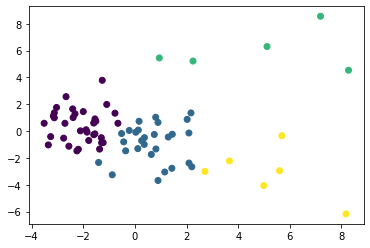

In [ ]:
plt.scatter(x_pca[:,0],x_pca[:,1],c=kmod_final.labels_)

In [ ]:
ac2 = AgglomerativeClustering(n_clusters = 4,affinity="euclidean",linkage="ward")

In [ ]:
p=ac2.fit_predict(x_scaled)

In [ ]:
p

array([1, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 3,
       1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3,
       3, 1, 1, 1, 1, 1, 3, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 2, 2, 1])

In [ ]:
score = silhouette_score(x,ac2.labels_,metric="euclidean")

In [ ]:
score

0.0431060877489781